In [43]:
def gaussian_psf(size=21, sigma=3):
    ax = np.arange(-size // 2 + 1., size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    psf = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    psf /= np.sum(psf)
    return psf

In [44]:
import numpy as np

def deconvolution_noise_equals_psf(img, psf, eps=1e-6):
    img = img.astype(np.float32) / 255.0

    # Pad PSF
    psf_padded = np.zeros_like(img)
    kh, kw = psf.shape
    sh = (img.shape[0] - kh) // 2
    sw = (img.shape[1] - kw) // 2
    psf_padded[sh:sh+kh, sw:sw+kw] = psf
    psf_padded = np.fft.ifftshift(psf_padded)

    # FFTs
    G = np.fft.fft2(img)
    H = np.fft.fft2(psf_padded)

    # ASSUMPTION: noise == PSF
    N = H

    # Your equation
    F_hat = (G - N) / (H + eps)

    f_hat = np.fft.ifft2(F_hat)
    f_hat = np.real(f_hat)

    f_hat = np.clip(f_hat * 255, 0, 255).astype(np.uint8)
    return f_hat


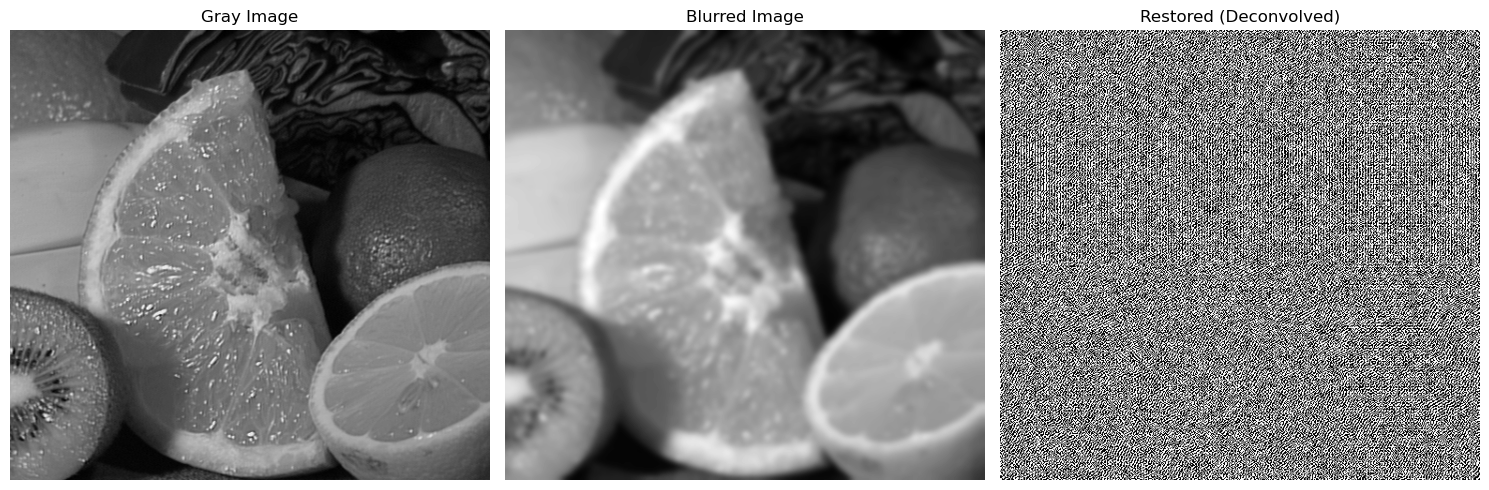

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# img_path = r"C:\Users\3kp05\Downloads\mountains-0m6.png"  
img_path = r"C:\Users\3kp05\Downloads\fruits.bmp"
img_bgr = cv2.imread(img_path)
if img_bgr is None:
    raise ValueError("Image not found")

gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

ksize = 21
sigma = 3
blurred = cv2.GaussianBlur(gray, (ksize, ksize), sigma)

psf = gaussian_psf(size=ksize, sigma=sigma)

# K_values = [0.2,0.4,0.6,0.8]
# restored = wiener_deconvolution(blurred, psf, 0.005)

restored = deconvolution_noise_equals_psf(blurred, psf)

import matplotlib.pyplot as plt
import cv2  # or use PIL/skimage



images = [gray, blurred, restored]
titles = ['Gray Image', 'Blurred Image', 'Restored (Deconvolved)']

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axes):
    # cmap='gray' ensures the 2D array is rendered as grayscale
    ax.imshow(images[i], cmap='gray')
    
    # CORRECTED: use .set_title()
    ax.set_title(titles[i]) 
    
    ax.axis('off')  # Hide pixel coordinates

plt.tight_layout()
plt.show()

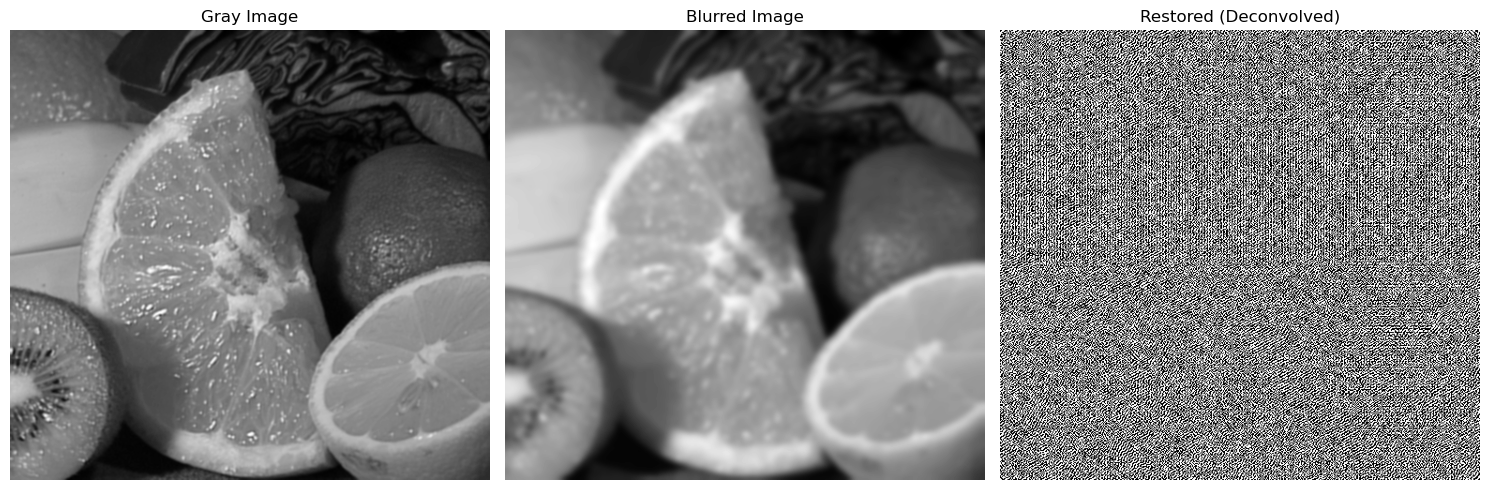

In [46]:
# with slight preprocessing

gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
# Pre-process: overwrite gray with a smoother version to reduce noise
gray = cv2.GaussianBlur(gray, (3, 3), 0)

ksize = 21
sigma = 3
blurred = cv2.GaussianBlur(gray, (ksize, ksize), sigma)

psf = gaussian_psf(size=ksize, sigma=sigma)

# K_values = [0.2,0.4,0.6,0.8]
# restored = wiener_deconvolution(blurred, psf, 0.005)

restored = deconvolution_noise_equals_psf(blurred, psf)

import matplotlib.pyplot as plt
import cv2  # or use PIL/skimage



images = [gray, blurred, restored]
titles = ['Gray Image', 'Blurred Image', 'Restored (Deconvolved)']

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axes):
    # cmap='gray' ensures the 2D array is rendered as grayscale
    ax.imshow(images[i], cmap='gray')
    
    # CORRECTED: use .set_title()
    ax.set_title(titles[i]) 
    
    ax.axis('off')  # Hide pixel coordinates

plt.tight_layout()
plt.show()

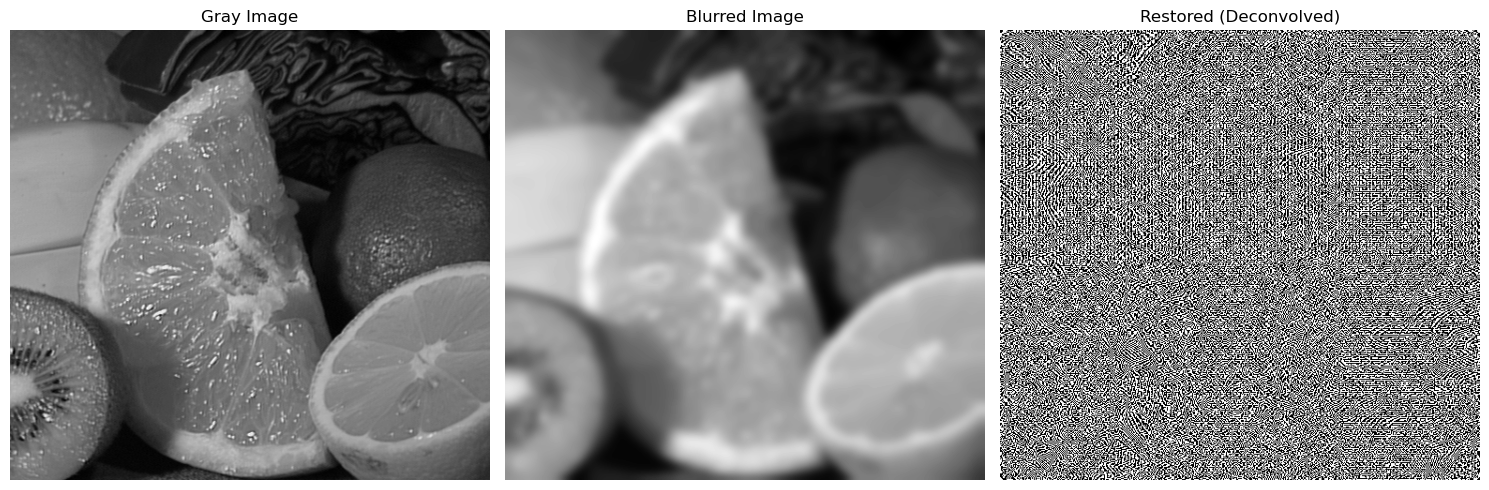

In [47]:
#  with more initial blur

gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
# # Pre-process: overwrite gray with a smoother version to reduce noise
# gray = cv2.GaussianBlur(gray, (3, 3), 0)

ksize = 33
sigma = 5
blurred = cv2.GaussianBlur(gray, (ksize, ksize), sigma)

psf = gaussian_psf(size=ksize, sigma=sigma)

# K_values = [0.2,0.4,0.6,0.8]
# restored = wiener_deconvolution(blurred, psf, 0.005)

restored = deconvolution_noise_equals_psf(blurred, psf)

import matplotlib.pyplot as plt
import cv2  # or use PIL/skimage



images = [gray, blurred, restored]
titles = ['Gray Image', 'Blurred Image', 'Restored (Deconvolved)']

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axes):
    # cmap='gray' ensures the 2D array is rendered as grayscale
    ax.imshow(images[i], cmap='gray')
    
    # CORRECTED: use .set_title()
    ax.set_title(titles[i]) 
    
    ax.axis('off')  # Hide pixel coordinates

plt.tight_layout()
plt.show()

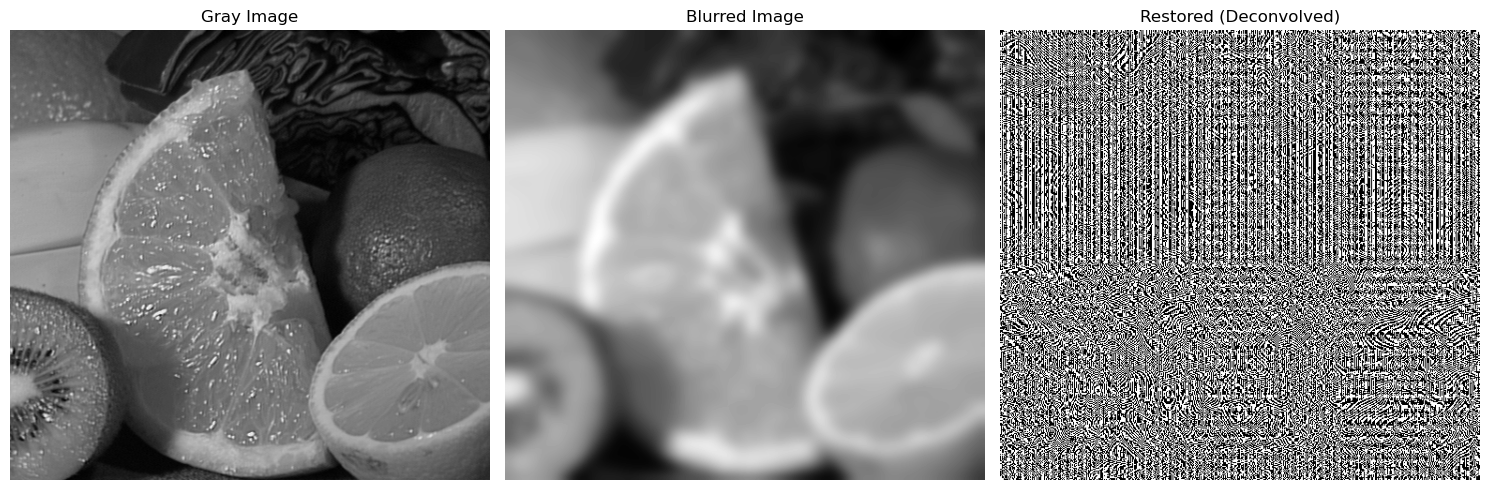

In [48]:
#  with more initial blur

gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
# # Pre-process: overwrite gray with a smoother version to reduce noise
# gray = cv2.GaussianBlur(gray, (3, 3), 0)

ksize = 45
sigma = 7
blurred = cv2.GaussianBlur(gray, (ksize, ksize), sigma)

psf = gaussian_psf(size=ksize, sigma=sigma)

# K_values = [0.2,0.4,0.6,0.8]
# restored = wiener_deconvolution(blurred, psf, 0.005)

restored = deconvolution_noise_equals_psf(blurred, psf)

import matplotlib.pyplot as plt
import cv2  # or use PIL/skimage



images = [gray, blurred, restored]
titles = ['Gray Image', 'Blurred Image', 'Restored (Deconvolved)']

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axes):
    # cmap='gray' ensures the 2D array is rendered as grayscale
    ax.imshow(images[i], cmap='gray')
    
    # CORRECTED: use .set_title()
    ax.set_title(titles[i]) 
    
    ax.axis('off')  # Hide pixel coordinates

plt.tight_layout()
plt.show()

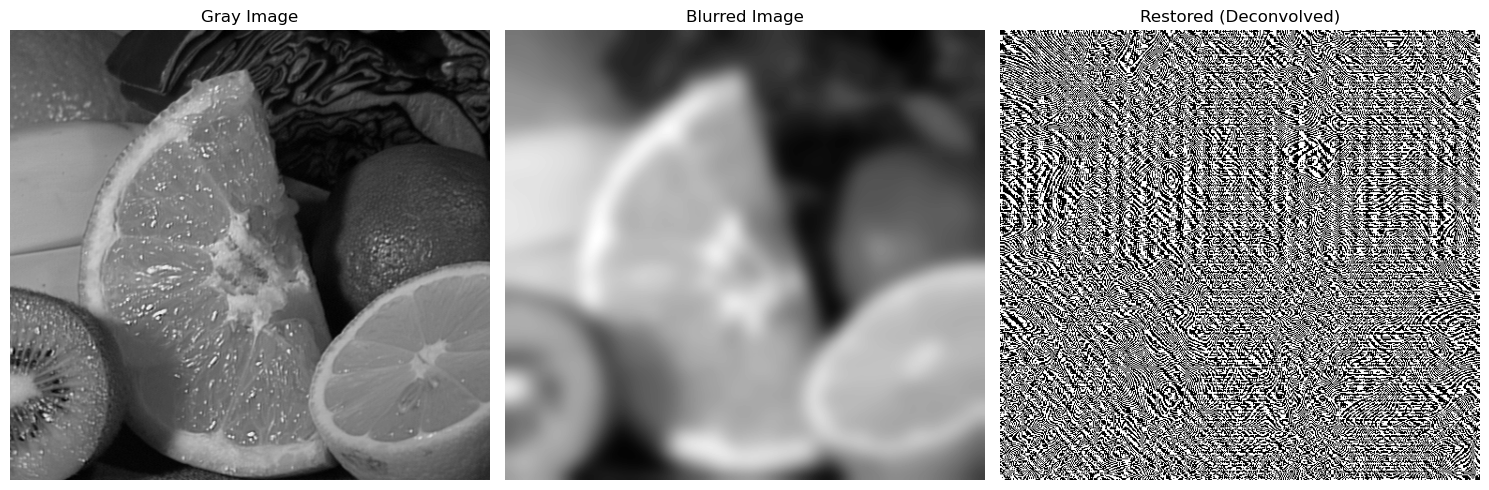

In [49]:
#  with more initial blur

gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
# # Pre-process: overwrite gray with a smoother version to reduce noise
# gray = cv2.GaussianBlur(gray, (3, 3), 0)

ksize = 55
sigma = 9
blurred = cv2.GaussianBlur(gray, (ksize, ksize), sigma)

psf = gaussian_psf(size=ksize, sigma=sigma)

# K_values = [0.2,0.4,0.6,0.8]
# restored = wiener_deconvolution(blurred, psf, 0.005)

restored = deconvolution_noise_equals_psf(blurred, psf)

import matplotlib.pyplot as plt
import cv2  # or use PIL/skimage



images = [gray, blurred, restored]
titles = ['Gray Image', 'Blurred Image', 'Restored (Deconvolved)']

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axes):
    # cmap='gray' ensures the 2D array is rendered as grayscale
    ax.imshow(images[i], cmap='gray')
    
    # CORRECTED: use .set_title()
    ax.set_title(titles[i]) 
    
    ax.axis('off')  # Hide pixel coordinates

plt.tight_layout()
plt.show()

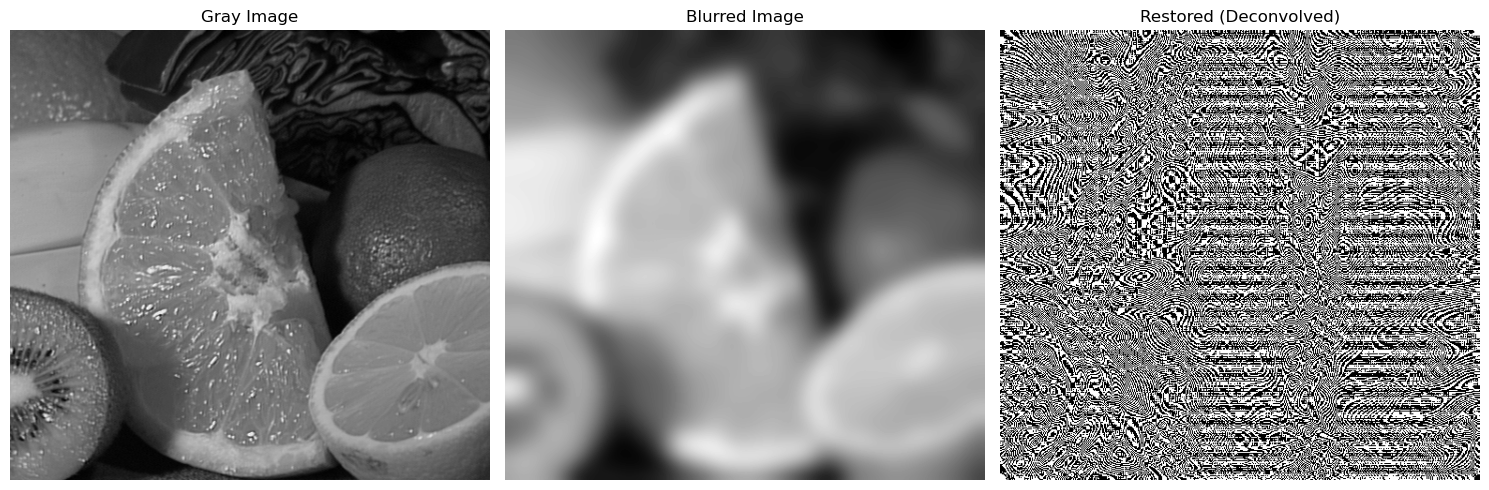

In [50]:
#  with more initial blur

gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
# # Pre-process: overwrite gray with a smoother version to reduce noise
# gray = cv2.GaussianBlur(gray, (3, 3), 0)

ksize = 69
sigma = 11
blurred = cv2.GaussianBlur(gray, (ksize, ksize), sigma)

psf = gaussian_psf(size=ksize, sigma=sigma)

# K_values = [0.2,0.4,0.6,0.8]
# restored = wiener_deconvolution(blurred, psf, 0.005)

restored = deconvolution_noise_equals_psf(blurred, psf)

import matplotlib.pyplot as plt
import cv2  # or use PIL/skimage



images = [gray, blurred, restored]
titles = ['Gray Image', 'Blurred Image', 'Restored (Deconvolved)']

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axes):
    # cmap='gray' ensures the 2D array is rendered as grayscale
    ax.imshow(images[i], cmap='gray')
    
    # CORRECTED: use .set_title()
    ax.set_title(titles[i]) 
    
    ax.axis('off')  # Hide pixel coordinates

plt.tight_layout()
plt.show()